In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
df= pd.read_csv(r'/Users/binodrai/Desktop/projects/credit classification/credit_fraud_data.csv')

EDA

In [2]:
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0
5,156.838526,44,20,27,375,93,Male,Prepaid,Online,Electronics,0
6,59.025529,70,16,19,727,79,Male,Prepaid,ATM,Electronics,0
7,866.309970,65,0,23,431,91,Male,Debit,ATM,Entertainment,1
8,601.513897,24,17,18,797,49,Female,Prepaid,In-store,Travel,1
9,708.364505,76,9,11,604,55,Male,Prepaid,ATM,Grocery,0


In [3]:
df.tail(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
4489,564.329028,40,15,8,506,16,Male,Prepaid,ATM,Travel,1
4490,261.901270,27,0,14,334,80,Female,Prepaid,In-store,Clothing,0
4491,695.258166,68,16,9,712,28,Female,Credit,In-store,Travel,0
4492,567.823553,36,17,16,663,62,Female,Credit,ATM,Travel,0
4493,796.447366,68,12,28,609,20,Male,Credit,Online,Travel,1
4494,735.290161,85,4,25,578,35,Female,Credit,ATM,Grocery,0
4495,610.497814,59,23,18,451,59,Male,Prepaid,ATM,Grocery,0
4496,488.689498,74,5,11,526,9,Male,Credit,In-store,Clothing,0
4497,134.048944,85,0,8,542,10,Male,Credit,In-store,Clothing,0
4498,262.071685,55,9,14,309,45,Male,Credit,ATM,Entertainment,0


In [4]:
df.describe().round(3)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,496.905,53.644,11.648,14.387,574.325,50.042,0.255
std,289.265,20.903,6.915,8.551,159.100,28.685,0.436
min,1.012,18.000,0.000,0.000,300.000,1.000,0.000
25%,244.041,35.000,6.000,7.000,434.000,25.000,0.000
50%,500.901,54.000,12.000,14.000,576.000,50.000,0.000
75%,744.026,72.000,18.000,22.000,711.000,75.000,1.000
max,999.718,89.000,23.000,29.000,849.000,99.000,1.000


In [5]:
df.isnull().sum()

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
gender                         0
card_type                      0
transaction_type               0
merchant_category              0
is_fraud                       0
dtype: int64

In [6]:
df.dtypes

transaction_amount             float64
age                              int64
transaction_hour                 int64
days_since_last_transaction      int64
credit_score                     int64
number_of_transactions           int64
gender                          object
card_type                       object
transaction_type                object
merchant_category               object
is_fraud                         int64
dtype: object

In [7]:
df.nunique()

transaction_amount             4499
age                              72
transaction_hour                 24
days_since_last_transaction      30
credit_score                    550
number_of_transactions           99
gender                            2
card_type                         3
transaction_type                  3
merchant_category                 5
is_fraud                          2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   transaction_amount           4499 non-null   float64
 1   age                          4499 non-null   int64  
 2   transaction_hour             4499 non-null   int64  
 3   days_since_last_transaction  4499 non-null   int64  
 4   credit_score                 4499 non-null   int64  
 5   number_of_transactions       4499 non-null   int64  
 6   gender                       4499 non-null   object 
 7   card_type                    4499 non-null   object 
 8   transaction_type             4499 non-null   object 
 9   merchant_category            4499 non-null   object 
 10  is_fraud                     4499 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 386.8+ KB


In [9]:
df.dropna().head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,375.165579,68,21,18,605,22,Male,Debit,In-store,Entertainment,1
1,950.763592,88,21,4,841,5,Male,Credit,Online,Grocery,0
2,732.261948,65,15,28,760,15,Female,Debit,In-store,Entertainment,1
3,599.059826,36,23,4,525,36,Male,Credit,Online,Entertainment,0
4,156.862622,23,9,20,358,63,Male,Credit,Online,Entertainment,0
5,156.838526,44,20,27,375,93,Male,Prepaid,Online,Electronics,0
6,59.025529,70,16,19,727,79,Male,Prepaid,ATM,Electronics,0
7,866.309970,65,0,23,431,91,Male,Debit,ATM,Entertainment,1
8,601.513897,24,17,18,797,49,Female,Prepaid,In-store,Travel,1
9,708.364505,76,9,11,604,55,Male,Prepaid,ATM,Grocery,0


In [10]:
df.isna().head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.duplicated().head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool

In [12]:
df.shape

(4499, 11)

In [13]:
df.size

49489

In [14]:
df.ndim

2

In [15]:
df.columns

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'gender', 'card_type', 'transaction_type', 'merchant_category',
       'is_fraud'],
      dtype='object')

In [16]:
df['merchant_category'].value_counts()

merchant_category
Electronics      938
Grocery          910
Entertainment    901
Travel           890
Clothing         860
Name: count, dtype: int64

In [17]:
df['transaction_type'].value_counts()

transaction_type
In-store    1537
Online      1505
ATM         1457
Name: count, dtype: int64

In [18]:
df['card_type'].value_counts()

card_type
Credit     1519
Debit      1500
Prepaid    1480
Name: count, dtype: int64

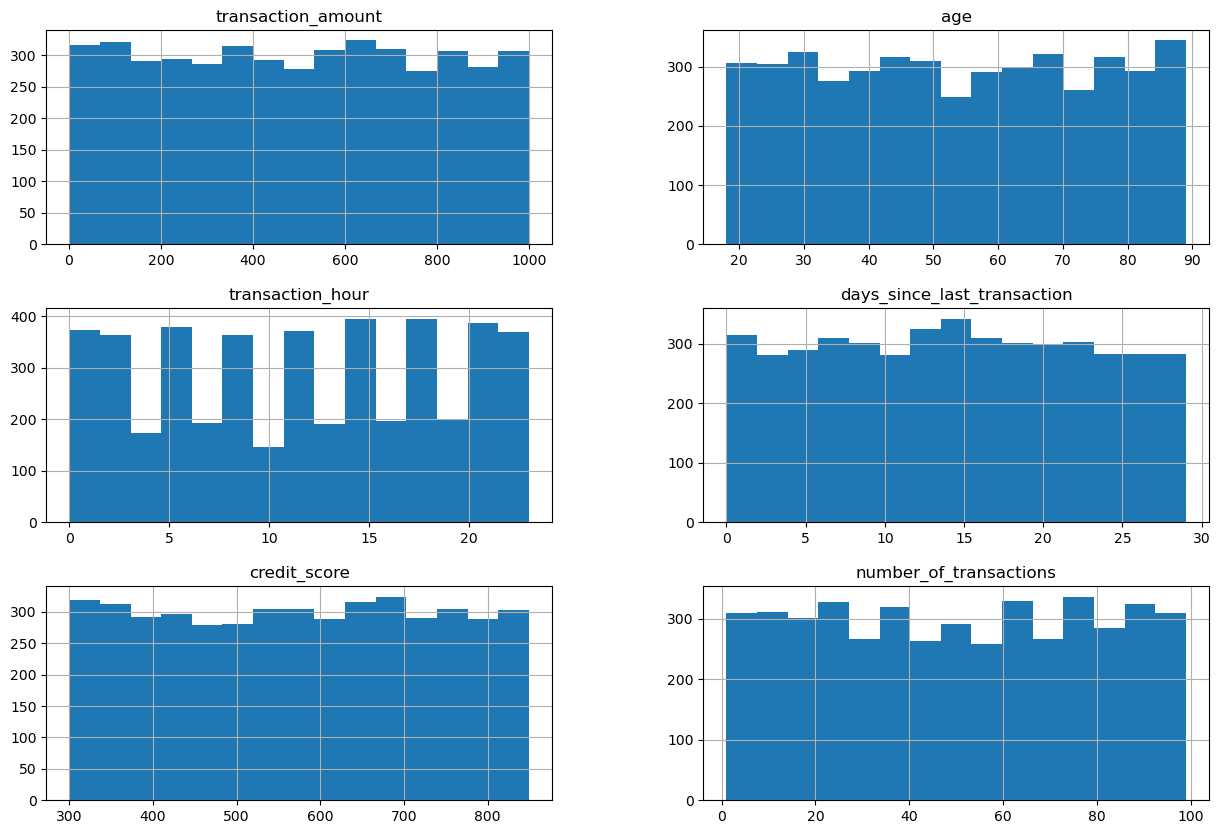

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical variables
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',	'number_of_transactions']
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.show()

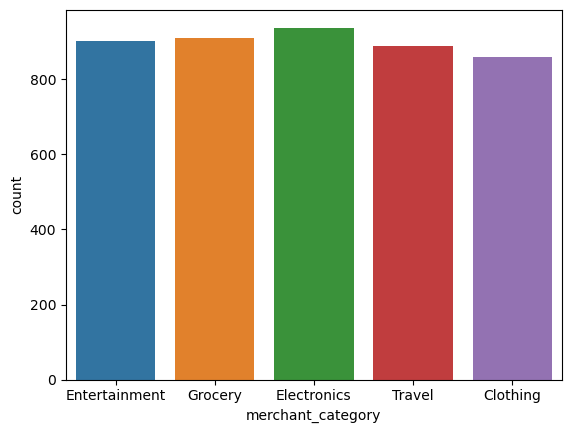

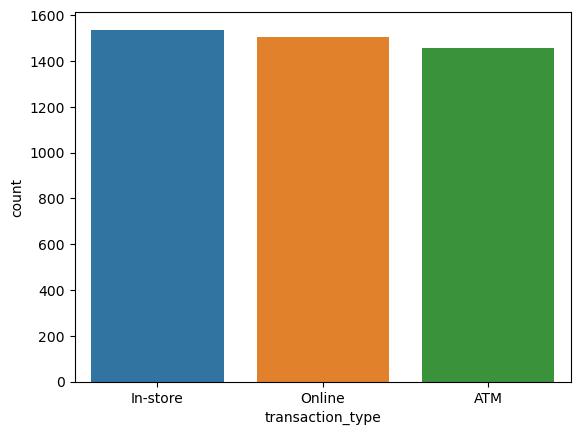

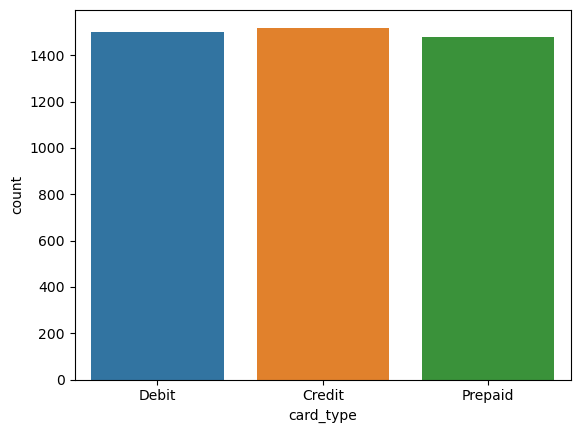

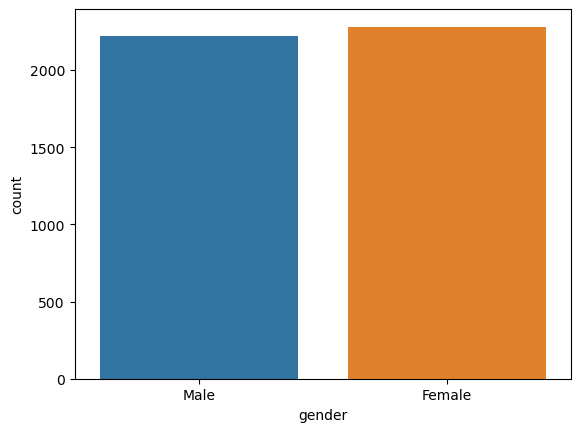

In [20]:
# Bar plot for categorical variables
categorical_cols = ['merchant_category', 'transaction_type' , 'card_type', 'gender']
for col in categorical_cols:
    sns.countplot(x=col, data=df)
    plt.show()

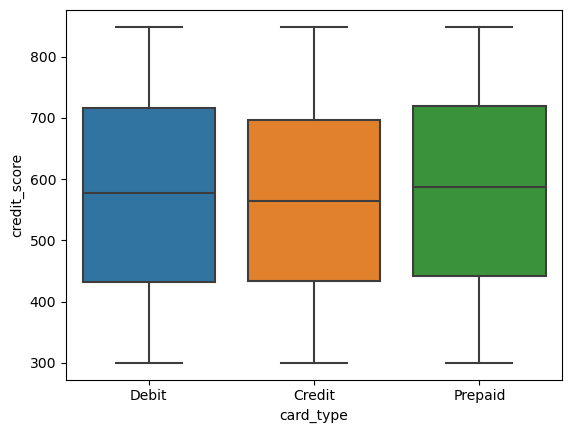

In [21]:
# Scatter plot for numerical variables


# Box plot for loan amount by loan grade
sns.boxplot(x='card_type', y='credit_score', data=df)
plt.show()

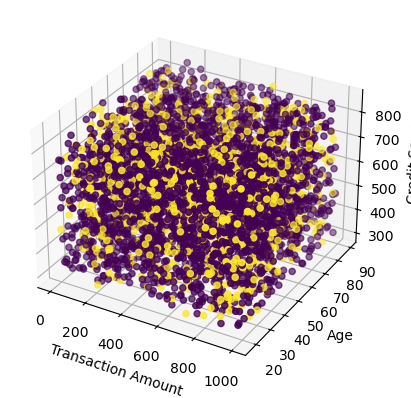

In [22]:
# 3D Scatter plot for three numerical variables
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['transaction_amount'], df['age'], df['credit_score'], c=df['is_fraud'])
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Age')
ax.set_zlabel('Credit Score')
plt.show()

In [23]:
import sweetviz as sv

# Generate the report
report = sv.analyze(df)
report.show_html('credit_fraud_analysis_report.html')

                                             |      | [  0%]   00:00 -> (? left)

Report credit_fraud_analysis_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


Feature Engineering

In [24]:
# Define categorical and numerical columns
categorical_cols = ['merchant_category', 'transaction_type' , 'card_type', 'gender']
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']

In [25]:
#Step 1:Missing value imputation ( checking missing values)
df.isnull().sum()

transaction_amount             0
age                            0
transaction_hour               0
days_since_last_transaction    0
credit_score                   0
number_of_transactions         0
gender                         0
card_type                      0
transaction_type               0
merchant_category              0
is_fraud                       0
dtype: int64

In [26]:
#Step 2:Outlier removal (capping) 
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category,is_fraud
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,Male,Debit,In-store,Entertainment,1
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,Male,Credit,Online,Grocery,0
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,Female,Debit,In-store,Entertainment,1
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,Male,Credit,Online,Entertainment,0
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,Male,Credit,Online,Entertainment,0
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,Male,Prepaid,Online,Electronics,0
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,Male,Prepaid,ATM,Electronics,0
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,Male,Debit,ATM,Entertainment,1
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,Female,Prepaid,In-store,Travel,1
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,Male,Prepaid,ATM,Grocery,0


In [27]:
#now checking if it is scaled and capped
df.describe().round(3)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,-0.000,-0.000,0.000,0.000,-0.000,-0.000,0.255
std,1.000,1.000,1.000,1.000,1.000,1.000,0.436
min,-1.715,-1.705,-1.685,-1.683,-1.724,-1.710,0.000
25%,-0.874,-0.892,-0.817,-0.864,-0.882,-0.873,0.000
50%,0.014,0.017,0.051,-0.045,0.011,-0.001,0.000
75%,0.854,0.878,0.919,0.890,0.859,0.870,1.000
max,1.738,1.692,1.642,1.709,1.727,1.707,1.000


In [28]:
#Step 3: convert categorical into numerical by ordinal and one hot encoding
# Apply One-Hot Encoding for 'merchant_category', 'transaction_type' , 'card_type', 'gender'
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [29]:
#check categorical are converted
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel,transaction_type_In-store,transaction_type_Online,card_type_Debit,card_type_Prepaid,gender_Male
0,-0.420905,0.686878,1.352627,0.422526,0.192823,-0.977689,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.569182,1.643795,1.352627,-1.214808,1.676330,-1.570397,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.813729,0.543341,0.484824,1.592050,1.167160,-1.221746,1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.353193,-0.844188,1.641894,-1.214808,-0.310060,-0.489577,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-1.175671,-1.466184,-0.382979,0.656431,-1.359830,0.451783,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5,-1.175755,-0.461421,1.207993,1.475098,-1.252967,1.497738,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
6,-1.513936,0.782570,0.629458,0.539478,0.959721,1.009625,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,1.277190,0.543341,-1.684683,1.007288,-0.900948,1.428007,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
8,0.361677,-1.418338,0.774091,0.422526,1.399744,-0.036330,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0.731105,1.069645,-0.382979,-0.396141,0.186537,0.172861,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0


In [30]:
df.columns

Index(['transaction_amount', 'age', 'transaction_hour',
       'days_since_last_transaction', 'credit_score', 'number_of_transactions',
       'is_fraud', 'merchant_category_Electronics',
       'merchant_category_Entertainment', 'merchant_category_Grocery',
       'merchant_category_Travel', 'transaction_type_In-store',
       'transaction_type_Online', 'card_type_Debit', 'card_type_Prepaid',
       'gender_Male'],
      dtype='object')

Feature creation

In [31]:
#Feature Selection
# Calculate correlation coefficients between numerical features and the target variable
numerical_features = ['transaction_amount','age','transaction_hour', 'days_since_last_transaction', 'credit_score',
                                   'number_of_transactions']
correlations = df[numerical_features + ['is_fraud']].corr()['is_fraud'].sort_values()

In [32]:
correlations

transaction_hour               0.000014
age                            0.001507
transaction_amount             0.002242
days_since_last_transaction    0.005217
number_of_transactions         0.008564
credit_score                   0.011210
is_fraud                       1.000000
Name: is_fraud, dtype: float64

In [33]:
# Calculate Information Value (IV) for categorical columns
def calculate_iv(df, feature, target):
    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 0)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 1)].count()[feature]
        })
    iv_df = pd.DataFrame(lst)
    iv_df['Share'] = iv_df['All'] / iv_df['All'].sum()
    iv_df['Bad Rate'] = iv_df['Bad'] / iv_df['All']
    iv_df['Good Rate'] = iv_df['Good'] / iv_df['All']
    iv_df['WOE'] = np.log(iv_df['Good Rate'] / iv_df['Bad Rate'])
    iv_df['IV'] = (iv_df['Good Rate'] - iv_df['Bad Rate']) * iv_df['WOE']
    iv = iv_df['IV'].sum()
    return iv

categorical_features = ['merchant_category_Electronics', 'transaction_type_In-store' ,'transaction_type_Online', 'card_type_Debit','card_type_Prepaid', 
                        'gender_Male','merchant_category_Entertainment',
                        'merchant_category_Grocery','merchant_category_Travel']

print("\nInformation Value (IV) for categorical features:")
for feature in categorical_features:
    iv = calculate_iv(df, feature, 'is_fraud')
    print(f"{feature}: {iv}")


Information Value (IV) for categorical features:
merchant_category_Electronics: 1.050383089232602
transaction_type_In-store: 1.055418016315334
transaction_type_Online: 1.098955813690369
card_type_Debit: 1.0471428178888444
card_type_Prepaid: 1.0302016526469204
gender_Male: 1.049315784363943
merchant_category_Entertainment: 1.0221451700670983
merchant_category_Grocery: 1.0904719610974327
merchant_category_Travel: 1.041568142544516


In [34]:
#CHECKING TO KNOW THE DATA INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   transaction_amount               4499 non-null   float64
 1   age                              4499 non-null   float64
 2   transaction_hour                 4499 non-null   float64
 3   days_since_last_transaction      4499 non-null   float64
 4   credit_score                     4499 non-null   float64
 5   number_of_transactions           4499 non-null   float64
 6   is_fraud                         4499 non-null   int64  
 7   merchant_category_Electronics    4499 non-null   float64
 8   merchant_category_Entertainment  4499 non-null   float64
 9   merchant_category_Grocery        4499 non-null   float64
 10  merchant_category_Travel         4499 non-null   float64
 11  transaction_type_In-store        4499 non-null   float64
 12  transaction_type_Onl

#FINISHED WITH FEATURE ENGINEERING 
MODEL BUILDING

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
    
    
    #define features and target
X = df.drop(columns=['is_fraud'])
y = df['is_fraud']

# Find class ratio
class_ratio = y.value_counts(normalize=True)
print(f"Class ratio:\n{class_ratio}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

 #Check class ratio after resampling
class_ratio_resampled = y_train.value_counts(normalize=True)
print(f"Class ratio after SMOTE:\n{class_ratio_resampled}")

Class ratio:
is_fraud
0    0.744832
1    0.255168
Name: proportion, dtype: float64
Class ratio after SMOTE:
is_fraud
0    0.5
1    0.5
Name: proportion, dtype: float64


In [36]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'Support Vector Machine': SVC(probability=True)
}

# Evaluate each model and print the classification report
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.72      0.57      0.63       661
           1       0.24      0.38      0.30       239

    accuracy                           0.52       900
   macro avg       0.48      0.48      0.47       900
weighted avg       0.59      0.52      0.54       900

------------------------------------------------------------
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       661
           1       0.28      0.50      0.36       239

    accuracy                           0.52       900
   macro avg       0.51      0.52      0.49       900
weighted avg       0.62      0.52      0.55       900

------------------------------------------------------------
Classification Report for Bagging Classifier:
              precision    recall  f1-score   support

           0       0.74      

#SELECTING WHICH MODEL TO CHOOSE BY ACCURACY RECALL AND PRECISION
MODEL SELECTION

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Initialize and fit the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)

# Evaluate Gradient Boosting model at various cutoff levels
cutoff_levels = [0.3, 0.4, 0.5, 0.6, 0.7]
for cutoff in cutoff_levels:
    y_pred_proba = gb_model.predict_proba(X_test)[:, 1]
    y_pred = (y_pred_proba >= cutoff).astype(int)
    print(f"Classification Report for Gradient Boosting at cutoff {cutoff}:")
    print(classification_report(y_test, y_pred))
    print('-' * 60)

Classification Report for Gradient Boosting at cutoff 0.3:
              precision    recall  f1-score   support

           0       0.74      0.25      0.37       661
           1       0.27      0.76      0.40       239

    accuracy                           0.39       900
   macro avg       0.51      0.51      0.39       900
weighted avg       0.62      0.39      0.38       900

------------------------------------------------------------
Classification Report for Gradient Boosting at cutoff 0.4:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77       661
           1       0.23      0.15      0.19       239

    accuracy                           0.64       900
   macro avg       0.48      0.49      0.48       900
weighted avg       0.60      0.64      0.61       900

------------------------------------------------------------
Classification Report for Gradient Boosting at cutoff 0.5:
              precision    recall  f1-score   s

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [38]:
# ##Hyper paranmerer tuning
 
# import xgboost as xgb
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, recall_score, accuracy_score
 
# # Define the model
# xgb_model = xgb.XGBClassifier()
 
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 6, 9],
#     'learning_rate': [0.01, 0.1, 0.3],
 

#     'gamma': [0, 0.1, 0.3],
#     'reg_alpha': [0, 0.1, 0.5],
# }
 
# # Define a custom scorer to use a cut-off threshold of 0.3 for classification
# def custom_scorer(y_true, y_pred_proba, threshold=0.3):
#     y_pred = (y_pred_proba[:, 1] >= threshold).astype(int)
#     recall = recall_score(y_true, y_pred)
#     accuracy = accuracy_score(y_true, y_pred)
#     return (recall + accuracy) / 2
 
# scorer = make_scorer(custom_scorer, needs_proba=True)
 
# # Perform Grid Search
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=scorer, cv=3, verbose=1, n_jobs=-1)
 
# # Fit the grid search to the data
# grid_search.fit(X_train, y_train)
 
# # Print the best parameters and best score
# print("Best parameters found: ", grid_search.best_params_)
# print("Best combined Recall and Accuracy score: ", grid_search.best_score_)
 
# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred_proba = best_model.predict_proba(X_test)
# y_pred = (y_pred_proba[:, 1] >= 0.3).astype(int)
 
# print("Test set Recall: ", recall_score(y_test, y_pred))
# print("Test set Accuracy: ", accuracy_score(y_test, y_pred))





In [39]:
#CROSS VALIDATION
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()

# Perform cross-validation
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and their mean
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", cv_scores.mean())


Cross-validation scores:  [0.5        0.63568773 0.93122677 0.91171004 0.92750929]
Mean cross-validation score:  0.7812267657992565


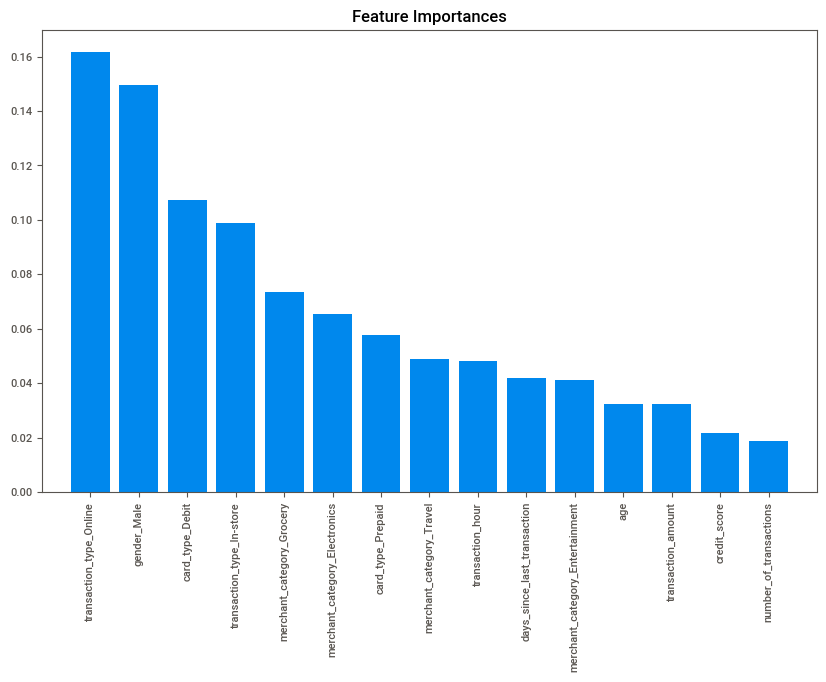

In [40]:
#FEATURE IMPORTANCE
# Fit the Gradient Boosting Classifier to the training data
gb_model.fit(X_train, y_train)

# Get feature importances
feature_importances = gb_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Prediction on new data 

In [52]:
import pandas as pd

# Define the path to the dataset
dataset_path = (r'/Users/binodrai/Desktop/projects/credit classification/credit_fraud_prediction.csv')

# Load the dataset into a pandas DataFrame
df_predict = pd.read_csv(dataset_path)

# Display the first few rows of the DataFrame
df_predict.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category
0,419.680373,79,4,13,691,82,Female,Prepaid,In-store,Travel
1,599.699988,24,0,0,347,15,Male,Credit,ATM,Travel
2,514.194147,88,22,16,503,30,Female,Credit,In-store,Entertainment
3,288.896341,67,10,0,456,48,Male,Debit,Online,Grocery
4,7.457893,69,23,22,325,96,Female,Credit,ATM,Entertainment
5,496.742983,43,23,28,720,40,Female,Prepaid,ATM,Grocery
6,286.340363,43,6,20,563,91,Female,Credit,Online,Clothing
7,734.873692,36,17,21,828,91,Male,Credit,Online,Electronics
8,24.922319,26,20,12,769,83,Female,Prepaid,ATM,Electronics
9,585.242983,78,19,29,553,74,Male,Debit,In-store,Travel


In [54]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Assuming df_predict is your DataFrame
# Separate the numeric and categorical columns
numeric_cols = df_predict.select_dtypes(include=['number']).columns
categorical_cols = df_predict.select_dtypes(exclude=['number']).columns

# Initialize the KNN Imputer for numeric columns
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the numeric columns
imputed_numeric_data = knn_imputer.fit_transform(df_predict[numeric_cols])

# Convert the imputed numeric data back to a DataFrame
df_imputed_numeric = pd.DataFrame(imputed_numeric_data, columns=numeric_cols)

# Initialize the Simple Imputer for categorical columns
most_frequent_imputer = SimpleImputer(strategy='most_frequent')

# Fit and transform the categorical columns
imputed_categorical_data = most_frequent_imputer.fit_transform(df_predict[categorical_cols])

# Convert the imputed categorical data back to a DataFrame
df_imputed_categorical = pd.DataFrame(imputed_categorical_data, columns=categorical_cols)

# Combine the imputed numeric and categorical columns back into a single DataFrame
df = pd.concat([df_imputed_numeric, df_imputed_categorical.reset_index(drop=True)], axis=1)

df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender,card_type,transaction_type,merchant_category
0,419.680373,79.0,4.0,13.0,691.0,82.0,0.0,Female,Prepaid,In-store,Travel
1,599.699988,24.0,0.0,0.0,347.0,15.0,0.0,Male,Credit,ATM,Travel
2,514.194147,88.0,22.0,16.0,503.0,30.0,0.0,Female,Credit,In-store,Entertainment
3,288.896341,67.0,10.0,0.0,456.0,48.0,0.0,Male,Debit,Online,Grocery
4,7.457893,69.0,23.0,22.0,325.0,96.0,0.0,Female,Credit,ATM,Entertainment
5,496.742983,43.0,23.0,28.0,720.0,40.0,0.0,Female,Prepaid,ATM,Grocery
6,286.340363,43.0,6.0,20.0,563.0,91.0,0.0,Female,Credit,Online,Clothing
7,734.873692,36.0,17.0,21.0,828.0,91.0,0.0,Male,Credit,Online,Electronics
8,24.922319,26.0,20.0,12.0,769.0,83.0,0.0,Female,Prepaid,ATM,Electronics
9,585.242983,78.0,19.0,29.0,553.0,74.0,0.0,Male,Debit,In-store,Travel


In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
# Assume df is your original DataFrame
 
# Identify numerical columns
numerical_cols =df.select_dtypes(include=['number']).columns
 
# Initialize the scaler
scaler = StandardScaler()
 
# Fit and transform only the numerical columns
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)
 
# Cap values at -3 and 3 for scaled numerical columns
scaled_numerical_df = scaled_numerical_df.clip(lower=-3, upper=3)
 
# Merge scaled numerical columns back into the original DataFrame
df[numerical_cols] = scaled_numerical_df
 
# If needed, print the resulting DataFrame
df.head(10)

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,gender,card_type,transaction_type,merchant_category
0,-0.281069,1.219111,-1.112498,-0.150690,0.674356,1.175390,Female,Prepaid,In-store,Travel
1,0.339631,-1.418292,-1.680509,-1.642249,-1.434769,-1.213319,Male,Credit,ATM,Travel
2,0.044810,1.650686,1.443554,0.193516,-0.478305,-0.678534,Female,Credit,In-store,Entertainment
3,-0.732007,0.643678,-0.260480,-1.642249,-0.766471,-0.036791,Male,Debit,Online,Grocery
4,-1.702395,0.739583,1.585557,0.881927,-1.569655,1.674523,Female,Credit,ATM,Entertainment
5,-0.015361,-0.507189,1.585557,1.570339,0.852160,-0.322010,Female,Prepaid,ATM,Grocery
6,-0.740820,-0.507189,-0.828492,0.652457,-0.110435,1.496261,Female,Credit,Online,Clothing
7,0.805704,-0.842859,0.733540,0.767192,1.514327,1.496261,Male,Credit,Online,Electronics
8,-1.642179,-1.322387,1.159549,-0.265426,1.152588,1.211042,Female,Prepaid,ATM,Electronics
9,0.289784,1.171158,1.017546,1.685074,-0.171746,0.890171,Male,Debit,In-store,Travel


In [45]:
# Define categorical and numerical columns
categorical_cols = ['gender','card_type','transaction_type','merchant_category']

In [56]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Apply One-Hot Encoding 
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = pd.DataFrame(one_hot_encoder.fit_transform(df[categorical_cols]), columns=one_hot_encoder.get_feature_names_out(categorical_cols))
df = df.drop(columns=categorical_cols)
df = pd.concat([df, encoded_categorical], axis=1)
df.head(10)

/Applications/anaconda3/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,gender_Male,card_type_Debit,card_type_Prepaid,transaction_type_In-store,transaction_type_Online,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel
0,419.680373,79.0,4.0,13.0,691.0,82.0,0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1,599.699988,24.0,0.0,0.0,347.0,15.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,514.194147,88.0,22.0,16.0,503.0,30.0,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,288.896341,67.0,10.0,0.0,456.0,48.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,7.457893,69.0,23.0,22.0,325.0,96.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,496.742983,43.0,23.0,28.0,720.0,40.0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,286.340363,43.0,6.0,20.0,563.0,91.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,734.873692,36.0,17.0,21.0,828.0,91.0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,24.922319,26.0,20.0,12.0,769.0,83.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
9,585.242983,78.0,19.0,29.0,553.0,74.0,0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [58]:
# Define the desired column order
desired_column_order = [
    'transaction_amount', 'age', 'transaction_hour', 'days_since_last_transaction', 
    'credit_score', 'number_of_transactions', 'is_fraud', 'merchant_category_Electronics', 
    'merchant_category_Entertainment', 'merchant_category_Grocery', 'merchant_category_Travel', 
    'transaction_type_In-store', 'transaction_type_Online', 'card_type_Debit', 'card_type_Prepaid', 
    'gender_Male'
]

# Add dummy 'is_fraud' column for consistency with desired order
df['is_fraud'] = 0

# Reorder the columns
df = df[desired_column_order]
df.head()

,transaction_amount,age,transaction_hour,days_since_last_transaction,credit_score,number_of_transactions,is_fraud,merchant_category_Electronics,merchant_category_Entertainment,merchant_category_Grocery,merchant_category_Travel,transaction_type_In-store,transaction_type_Online,card_type_Debit,card_type_Prepaid,gender_Male
0,419.680373,79.0,4.0,13.0,691.0,82.0,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,599.699988,24.0,0.0,0.0,347.0,15.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,514.194147,88.0,22.0,16.0,503.0,30.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,288.896341,67.0,10.0,0.0,456.0,48.0,0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
4,7.457893,69.0,23.0,22.0,325.0,96.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df.dtypes

transaction_amount                 float64
age                                float64
transaction_hour                   float64
days_since_last_transaction        float64
credit_score                       float64
number_of_transactions             float64
gender_Male                        float64
card_type_Debit                    float64
card_type_Prepaid                  float64
transaction_type_In-store          float64
transaction_type_Online            float64
merchant_category_Electronics      float64
merchant_category_Entertainment    float64
merchant_category_Grocery          float64
merchant_category_Travel           float64
dtype: object